In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the Temperature Dataset:

In [ ]:
temp=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Temperature.csv')

Identification of data types:

In [ ]:
temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Size of the dataset:

In [ ]:
temp.shape

(7752, 25)

Statistical Summary of Numberic Variables

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [ ]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [ ]:
temp.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [ ]:
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Non-Graphical Univariate Analysis:

In [ ]:
#Finding null values

print(temp.isnull().sum(axis = 0))

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [ ]:
#Removing the missing or the null values from the dataset

temp['station'].fillna(value=27,inplace=True)
temp['Date'].fillna(value=27,inplace=True)
temp['Present_Tmax'].fillna(value=27,inplace=True)
temp['Present_Tmin'].fillna(value=27,inplace=True)
temp['LDAPS_RHmin'].fillna(value=27,inplace=True)
temp['LDAPS_RHmax'].fillna(value=27,inplace=True)
temp['LDAPS_Tmax_lapse'].fillna(value=27,inplace=True)
temp['LDAPS_Tmin_lapse'].fillna(value=27,inplace=True)
temp['LDAPS_WS'].fillna(value=27,inplace=True)
temp['LDAPS_LH'].fillna(value=27,inplace=True)
temp['LDAPS_CC1'].fillna(value=27,inplace=True)
temp['LDAPS_CC2'].fillna(value=27,inplace=True)
temp['LDAPS_CC3'].fillna(value=27,inplace=True)
temp['LDAPS_CC4'].fillna(value=27,inplace=True)
temp['LDAPS_PPT1'].fillna(value=27,inplace=True)
temp['LDAPS_PPT2'].fillna(value=27,inplace=True)
temp['LDAPS_PPT3'].fillna(value=27,inplace=True)
temp['LDAPS_PPT4'].fillna(value=27,inplace=True)
temp['Next_Tmax'].fillna(value=27,inplace=True)
temp['Next_Tmin'].fillna(value=27,inplace=True)

In [ ]:
#check if the null values are removed

print(temp.isnull().sum(axis = 0))

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64


Graphical Univariate Analysis:

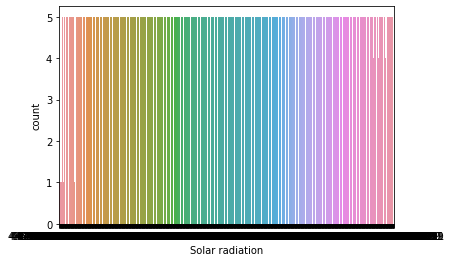

In [ ]:
#CountPlot

sns.countplot(temp['Solar radiation'])

In [ ]:
plt.figure(figsize=[13,13])
sns.pairplot(temp,diag_kind='kde')

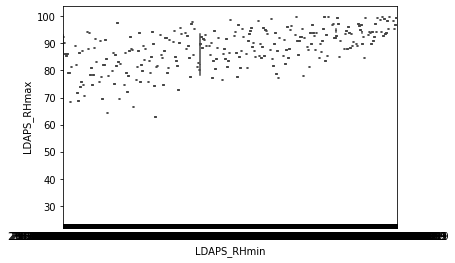

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=temp['LDAPS_RHmin'],y=temp['LDAPS_RHmax'])

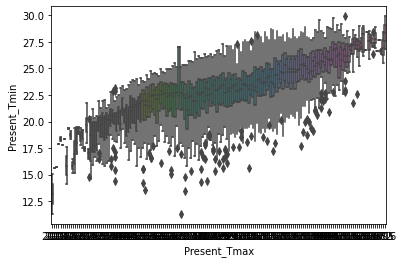

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=temp['Present_Tmax'],y=temp['Present_Tmin'])

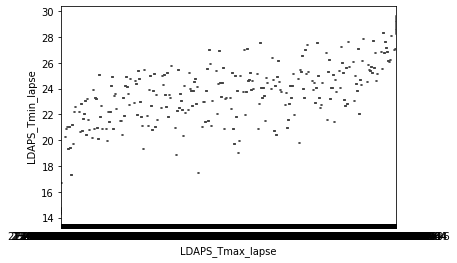

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=temp['LDAPS_Tmax_lapse'],y=temp['LDAPS_Tmin_lapse'])

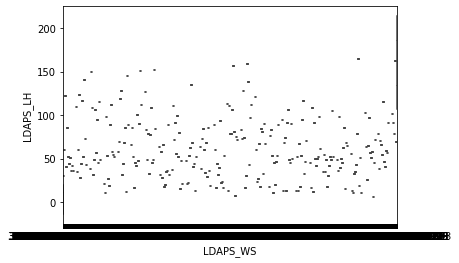

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=temp['LDAPS_WS'],y=temp['LDAPS_LH'])

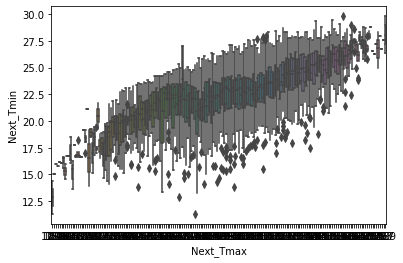

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=temp['Next_Tmax'],y=temp['Next_Tmin'])

In [ ]:
#checking for correaltion between variables

temp.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113520,0.127076,-0.065320,-0.128279,0.068556,0.103265,0.004799,-0.132023,0.000662,0.000308,0.000050,0.000577,0.000082,-0.003008,-0.003742,-0.002978,-0.237328,-0.118715,-0.255240,-0.089512,-0.019202,0.108566,0.125320
Present_Tmax,0.113520,1.000000,0.596682,-0.215214,-0.278219,0.560501,0.624724,-0.041745,0.127405,0.041816,0.051810,0.059011,0.059041,-0.006273,0.004985,0.018522,0.024622,-0.051470,0.009614,-0.185998,-0.103806,-0.026120,0.609622,0.614874
Present_Tmin,0.127076,0.596682,1.000000,0.097718,-0.087114,0.445103,0.764788,0.054997,-0.022681,0.127845,0.128475,0.119611,0.115746,0.162587,0.137520,0.091263,0.084024,-0.079189,-0.044038,-0.248211,-0.147399,0.054296,0.461712,0.787713
LDAPS_RHmin,-0.065320,-0.215214,0.097718,1.000000,0.560827,-0.534560,0.058497,0.084303,-0.048961,-0.134731,-0.123139,-0.130604,-0.146210,-0.002219,0.052543,-0.083605,-0.108951,0.085415,-0.074763,0.100145,0.121356,0.249185,-0.453534,0.077353
LDAPS_RHmax,-0.128279,-0.278219,-0.087114,0.560827,1.000000,-0.229043,-0.179555,-0.351988,0.247977,-0.606400,-0.610479,-0.623531,-0.630306,-0.391328,-0.434452,-0.546383,-0.546751,0.149966,0.019656,0.135711,0.168210,0.146599,-0.295305,-0.110880
LDAPS_Tmax_lapse,0.068556,0.560501,0.445103,-0.534560,-0.229043,1.000000,0.632110,-0.289439,0.056524,-0.130008,-0.137595,-0.137715,-0.127740,-0.135883,-0.207064,-0.155242,-0.145559,-0.041933,0.090322,-0.178217,-0.161716,0.052152,0.812965,0.572711
LDAPS_Tmin_lapse,0.103265,0.624724,0.764788,0.058497,-0.179555,0.632110,1.000000,0.000802,-0.147538,0.145082,0.148659,0.139938,0.136392,0.138410,0.120391,0.096943,0.092495,-0.095244,-0.026419,-0.193401,-0.183896,0.151024,0.596862,0.880238
LDAPS_WS,0.004799,-0.041745,0.054997,0.084303,-0.351988,-0.289439,0.000802,1.000000,-0.063777,0.685668,0.683345,0.681672,0.680227,0.602367,0.633048,0.659200,0.651449,0.027293,-0.044276,0.142243,0.127778,0.057151,-0.174369,-0.011809
LDAPS_LH,-0.132023,0.127405,-0.022681,-0.048961,0.247977,0.056524,-0.147538,-0.063777,1.000000,-0.117084,-0.128255,-0.125723,-0.119076,-0.089910,-0.128522,-0.087726,-0.085326,0.132513,0.025684,0.054843,0.086322,-0.041962,0.142906,-0.062279
LDAPS_CC1,0.000662,0.041816,0.127845,-0.134731,-0.606400,-0.130008,0.145082,0.685668,-0.117084,1.000000,0.997846,0.995421,0.993855,0.823057,0.846129,0.916886,0.908211,-0.000813,-0.000679,-0.001428,-0.002094,-0.028191,0.075219,0.087247


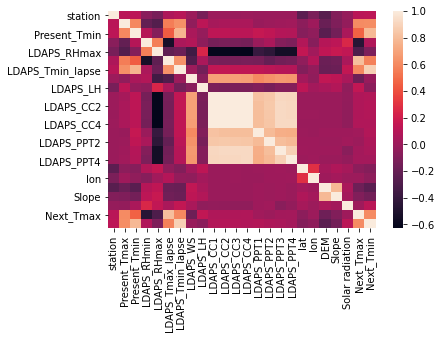

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(temp.corr())

In [ ]:
#Checking the skewness

temp.skew()

station             0.000384
Present_Tmax       -0.243115
Present_Tmin       -0.363907
LDAPS_RHmin         0.263839
LDAPS_RHmax        -2.935494
LDAPS_Tmax_lapse   -0.206301
LDAPS_Tmin_lapse   -0.575228
LDAPS_WS            3.522460
LDAPS_LH            0.682340
LDAPS_CC1           9.868932
LDAPS_CC2           9.874046
LDAPS_CC3           9.883067
LDAPS_CC4           9.878945
LDAPS_PPT1          6.214447
LDAPS_PPT2          6.635864
LDAPS_PPT3          8.049508
LDAPS_PPT4          7.972292
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.331317
Next_Tmin          -0.400800
dtype: float64

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
temp['station'] = le.fit_transform(temp['station'])
temp['Present_Tmax'] = le.fit_transform(temp['Present_Tmax'])
temp['Present_Tmin'] = le.fit_transform(temp['Present_Tmin'])
temp['LDAPS_RHmin'] = le.fit_transform(temp['LDAPS_RHmin'])
temp['LDAPS_RHmax'] = le.fit_transform(temp['LDAPS_RHmax'])
temp['LDAPS_Tmax_lapse'] = le.fit_transform(temp['LDAPS_Tmax_lapse'])
temp['LDAPS_Tmin_lapse'] = le.fit_transform(temp['LDAPS_Tmin_lapse'])
temp['LDAPS_WS'] = le.fit_transform(temp['LDAPS_WS'])
temp['LDAPS_LH'] = le.fit_transform(temp['LDAPS_LH'])
temp['LDAPS_CC1'] = le.fit_transform(temp['LDAPS_CC1'])
temp['LDAPS_CC2'] = le.fit_transform(temp['LDAPS_CC2'])
temp['LDAPS_CC3'] = le.fit_transform(temp['LDAPS_CC3'])
temp['LDAPS_CC4'] = le.fit_transform(temp['LDAPS_CC4'])
temp['LDAPS_PPT1'] = le.fit_transform(temp['LDAPS_PPT1'])
temp['LDAPS_PPT2'] = le.fit_transform(temp['LDAPS_PPT2'])
temp['LDAPS_PPT3'] = le.fit_transform(temp['LDAPS_PPT3'])
temp['LDAPS_PPT4'] = le.fit_transform(temp['LDAPS_PPT4'])
temp['lat'] = le.fit_transform(temp['lat'])
temp['lon'] = le.fit_transform(temp['lon'])
temp['DEM'] = le.fit_transform(temp['DEM'])
temp['Slope'] = le.fit_transform(temp['Slope'])
temp['Solar radiation'] = le.fit_transform(temp['Solar radiation'])
temp['Next_Tmax'] = le.fit_transform(temp['Next_Tmax'])
temp['Next_Tmin'] = le.fit_transform(temp['Next_Tmin'])

temp.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,2013-06-30,80,73,4446,4441,2282,2868,4328,4819,2744,2576,2553,2622,0,0,0,0,9,11,24,23,1574,92,75
1,1,2013-06-30,112,75,3259,4182,3985,4228,1943,3349,2643,3081,2522,2567,0,0,0,0,9,16,11,10,1531,106,88
2,2,2013-06-30,109,92,2473,1849,4244,5013,2957,733,2436,3146,3109,2826,0,0,0,0,8,19,9,6,1517,112,102
3,3,2013-06-30,113,93,4442,6944,3840,3267,1869,4569,2534,2786,2547,2679,0,0,0,0,11,14,12,21,1500,118,106
4,4,2013-06-30,107,78,4048,3994,3254,3465,2037,6846,1863,3056,2792,3167,0,0,0,0,7,24,10,9,1510,113,88


In [ ]:
#dummifying data required for spliting the data

temp = pd.get_dummies(temp)
temp.head(5)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_27,Date_2013-06-30,Date_2013-07-01,Date_2013-07-02,Date_2013-07-03,Date_2013-07-04,Date_2013-07-05,Date_2013-07-06,Date_2013-07-07,Date_2013-07-08,Date_2013-07-09,Date_2013-07-10,Date_2013-07-11,Date_2013-07-12,Date_2013-07-13,Date_2013-07-14,...,Date_2017-07-22,Date_2017-07-23,Date_2017-07-24,Date_2017-07-25,Date_2017-07-26,Date_2017-07-27,Date_2017-07-28,Date_2017-07-29,Date_2017-07-30,Date_2017-07-31,Date_2017-08-01,Date_2017-08-02,Date_2017-08-03,Date_2017-08-04,Date_2017-08-05,Date_2017-08-06,Date_2017-08-07,Date_2017-08-08,Date_2017-08-09,Date_2017-08-10,Date_2017-08-11,Date_2017-08-12,Date_2017-08-13,Date_2017-08-14,Date_2017-08-15,Date_2017-08-16,Date_2017-08-17,Date_2017-08-18,Date_2017-08-19,Date_2017-08-20,Date_2017-08-21,Date_2017-08-22,Date_2017-08-23,Date_2017-08-24,Date_2017-08-25,Date_2017-08-26,Date_2017-08-27,Date_2017-08-28,Date_2017-08-29,Date_2017-08-30
0,0,80,73,4446,4441,2282,2868,4328,4819,2744,2576,2553,2622,0,0,0,0,9,11,24,23,1574,92,75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,112,75,3259,4182,3985,4228,1943,3349,2643,3081,2522,2567,0,0,0,0,9,16,11,10,1531,106,88,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,109,92,2473,1849,4244,5013,2957,733,2436,3146,3109,2826,0,0,0,0,8,19,9,6,1517,112,102,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,113,93,4442,6944,3840,3267,1869,4569,2534,2786,2547,2679,0,0,0,0,11,14,12,21,1500,118,106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,107,78,4048,3994,3254,3465,2037,6846,1863,3056,2792,3167,0,0,0,0,7,24,10,9,1510,113,88,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = temp['Solar radiation']
X = temp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

Building the model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
#max_r_score=0
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =0,test_size=0.20)
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
r2_scr=r2_score(y_test,y_pred)
print("Max r2 score corresponding to is",r2_scr)

Max r2 score corresponding to is 1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("R2 Score: ", r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  1.0
RMSE: 1.9588804875620924e-12


In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(lreg,'temperature.pkl')

['temperature.pkl']